## Importing the Data

Our study involves seven time series datasets. Three relate to socio-economic 'demand-side' factors, three relate to climate, and one is a list of historic droughts (this will form our target variable).

Here is the list of links as to where to find the data:
1. Crop Yields from DEFRA http://www.defra.gov.uk/statistics/files/defra-stats-foodfarm-food-cereals-cerealoilseed-dataset-111222.xls
2. Industrial Production Index UK FRED Economic Data https://fred.stlouisfed.org/series/IPIUKM
3. Population Estimates ONS https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/adhocs/004356ukpopulationestimates1851to2014
4. Weather Records Met Office https://www.metoffice.gov.uk/research/climate/maps-and-data/uk-and-regional-series
5. List of droughts from EICD (specifically 'DWS events') https://reshare.ukdataservice.ac.uk/853673/

In [1]:
import pandas as pd

In [2]:
cropdata = pd.read_excel('defra-stats-foodfarm-food-cereals-cerealoilseed-dataset-111222.xls', sheet_name=1,
                         skiprows=8, usecols=[0,1], names=['Year', 'Wheat Yield'], skipfooter=4).astype({'Wheat Yield': float})
cropdata

,Year,Wheat Yield
0,1885,2.360000
1,1886,2.030000
2,1887,2.410000
3,1888,2.110000
4,1889,2.250000
...,...,...
122,2007,7.234263
123,2008,8.281403
124,2009,7.927665
125,2010,7.700000


In [3]:
ipidata = pd.read_excel('IPIUKM.xls', sheet_name=0,
                        skiprows=11, header=None, names=['Date', 'Industry Output'], )
ipidata

,Date,Industry Output
0,1920-01-01,29.27
1,1920-02-01,29.27
2,1920-03-01,28.69
3,1920-04-01,28.74
4,1920-05-01,29.54
...,...,...
1160,2016-09-01,103.90
1161,2016-10-01,102.70
1162,2016-11-01,105.10
1163,2016-12-01,106.00


In [4]:
popdata = pd.read_excel('ukpopulationestimates18512014.xls', sheet_name=1,
                        skiprows=6, header=None, usecols=[0,1], names=['Year', 'Population'],
                        skipfooter=14)
popdata

,Year,Population
0,1871,31484700
1,1872,31874200
2,1873,32177600
3,1874,32501500
4,1875,32838800
...,...,...
139,2010,62759456
140,2011,63285145
141,2012,63705030
142,2013,64105654


In [5]:
cols = ['year','jan','feb','mar','apr','may','jun',
        'jul','aug','sep','oct','nov','dec','win',
        'spr','sum','aut','ann']

In [6]:
with open('UK Mean Temp.txt') as f:
    tempdatatxt = f.read().split()[73:-10]

tempdata = pd.DataFrame([tempdatatxt[18*i:18*(i+1)] for i in range(137)],
                        columns=cols, dtype=float).astype({'year':int})
tempdata

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1885,2.0,4.2,3.5,6.6,7.6,12.3,14.5,12.4,10.9,6.2,4.8,3.0,3.14,5.92,13.09,7.28,7.36
1,1886,1.1,0.8,2.9,6.3,8.8,11.9,14.2,14.1,12.0,9.9,5.7,1.2,1.68,6.01,13.42,9.20,7.45
2,1887,2.1,3.5,3.3,5.4,8.7,14.3,15.6,14.0,10.6,6.4,3.9,2.1,2.23,5.80,14.61,6.97,7.51
3,1888,2.8,1.1,2.1,5.3,9.2,11.8,12.3,12.8,11.2,7.6,6.5,4.3,2.03,5.56,12.31,8.43,7.28
4,1889,3.0,2.2,3.8,6.0,11.4,14.0,13.6,13.4,11.5,7.6,6.1,3.1,3.21,7.10,13.66,8.41,8.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2017,3.8,5.2,7.3,8.0,12.1,14.4,15.1,14.5,12.5,11.2,5.7,4.1,4.97,9.12,14.70,9.84,9.53
133,2018,4.0,2.3,3.8,8.4,12.0,14.8,17.2,15.2,12.4,9.5,7.3,5.8,3.52,8.08,15.76,9.73,9.45
134,2019,3.4,6.0,6.8,8.4,10.0,13.2,16.4,15.8,13.1,8.9,5.3,5.1,5.05,8.38,15.14,9.10,9.39
135,2020,5.6,5.1,5.6,9.1,11.3,14.0,14.3,15.9,12.8,9.4,7.7,4.3,5.28,8.68,14.76,9.98,9.62


In [7]:
with open('UK Sunshine.txt') as f:
    sundatatxt = f.read().split()[75:-10]

sundata = pd.DataFrame([sundatatxt[18*i:18*(i+1)] for i in range(102)],
                        columns=cols, dtype=float).astype({'year':int})
sundata

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1920,43.2,68.7,103.9,95.4,176.5,197.6,123.4,127.4,105.3,101.3,50.5,36.2,144.1,375.9,448.4,257.1,1229.5
1,1921,30.2,62.6,100.1,182.4,208.6,220.8,204.9,138.3,142.5,102.9,55.8,32.9,129.0,491.1,564.0,301.1,1481.9
2,1922,38.4,65.3,97.8,159.6,209.1,182.7,138.2,122.6,101.4,108.7,53.1,32.4,136.6,466.5,443.5,263.2,1309.3
3,1923,42.5,46.8,105.6,128.9,158.5,126.7,162.5,164.8,137.5,90.2,71.9,38.0,121.8,393.0,453.9,299.5,1273.8
4,1924,41.2,50.4,130.7,133.9,146.0,161.4,169.2,118.8,111.5,82.2,46.2,35.5,129.6,410.6,449.4,239.9,1227.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2017,54.7,54.7,119.0,158.3,207.6,155.5,168.2,155.1,108.4,72.4,70.8,44.6,149.8,484.9,478.8,251.6,1369.3
98,2018,49.1,98.0,83.6,131.4,240.6,234.4,234.0,147.1,132.4,111.4,61.8,36.2,191.7,455.6,615.5,305.7,1560.1
99,2019,50.8,99.1,115.2,168.7,186.9,159.7,173.3,175.1,142.9,88.4,48.1,46.0,186.1,470.9,508.1,279.5,1454.4
100,2020,45.1,73.4,136.1,223.0,266.9,162.0,144.5,145.4,145.0,66.9,53.2,37.5,164.6,626.0,451.9,265.0,1498.9


In [8]:
with open('UK Rainfall.txt') as f:
    raindatatxt = f.read().split()[73:-10]

raindata = pd.DataFrame([raindatatxt[18*i:18*(i+1)] for i in range(185)],
                        columns=cols, dtype=float).astype({'year':int})
raindata

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1837,78.9,104.8,36.3,54.4,39.8,58.0,87.6,90.7,67.6,96.7,97.6,96.7,293.1,130.6,236.4,261.8,909.1
1,1838,35.2,55.6,69.4,57.1,61.8,117.8,84.2,92.9,74.9,93.7,120.4,74.2,187.5,188.3,294.9,289.0,937.2
2,1839,75.7,67.3,83.1,38.4,35.5,93.7,118.6,84.4,145.2,102.1,116.3,104.1,217.3,157.0,296.8,363.6,1064.6
3,1840,124.6,67.7,14.1,23.2,83.6,68.4,90.6,78.1,106.2,65.7,125.9,41.0,296.5,121.0,237.2,297.9,889.3
4,1841,80.3,58.6,74.1,57.1,70.4,70.5,91.3,117.9,118.8,150.9,108.1,123.3,179.8,201.6,279.7,377.7,1121.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,2017,76.0,93.3,97.7,33.2,57.2,110.4,101.3,102.3,117.2,101.4,107.7,120.6,246.6,188.1,314.1,326.3,1118.4
181,2018,132.4,68.6,103.8,83.9,47.7,34.7,54.2,83.0,101.4,104.2,121.7,117.7,321.6,235.5,171.9,327.3,1053.5
182,2019,64.6,71.1,128.9,48.6,63.6,109.0,89.1,132.6,126.1,139.8,119.1,139.6,253.4,241.1,330.7,385.0,1232.2
183,2020,121.3,213.7,78.5,30.0,32.8,107.7,96.0,122.2,77.4,182.6,105.0,166.6,474.6,141.3,325.9,365.0,1333.8


In [9]:
droughtdata = pd.read_csv('Drought EICD.csv')
droughtdata

,Entry ID,Date start (dd),Date start (mm),Date start (yyyy),Season start,Date end (dd),Date end (mm),Date end (yyyy),Season end,Text,...,NUTS1,NUTS2,NUTS3,Location,DPSIR,Sector,Water Company,Water Company 2018,WR typology,WR typology sub-category
0,1,1,1,1890,Winter,31,12,1890,Winter,"1890 Wiltshire, ‘In the deep well in the chalk...",...,UKK,UKK1,UKK15,Devizes,S,Water Resources,NaN,Bristol Water,Supply,NaN
1,2,1,9,1890,Autumn,30,9,1890,Autumn,"Many reports of dried up rivers (e.g., River L...",...,UKG,UKG1,UKG11,"Teme Valley, Herefordshire",IS,Water Resources,NaN,Dwr Cymru Welsh Water,Supply,NaN
2,3,1,9,1890,Autumn,30,9,1890,Autumn,"Many reports of dried up rivers (e.g., River L...",...,UKJ,UKJ1,UKJ11,River Lambourne,IS,Water Resources,NaN,Affinity Water,Supply,NaN
3,4,1,9,1890,Autumn,30,9,1890,Autumn,"Many reports of dried up rivers (e.g., River L...",...,UKG,UKG1,UKG12,Great Malvern,IS,Water Resources,NaN,Dwr Cymru Welsh Water,Supply,NaN
4,5,1,10,1890,Autumn,31,12,1890,Winter,Many failed or exceptionally low wells. For ex...,...,UKJ,UKJ1,UKJ11,Hungerford,IS,Water Resources,NaN,Affinity Water,Supply,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,430,1,1,2011,Winter,31,12,2012,Winter,NaN,...,"UKC, UKE, UKF, UKG, UKH, UKJ","UKC1, UKE1, UKE3, UKF1, UKF2, UKF3, UKG1, UKH1...","UKC11, UKC14, UKE13, UKE31, UKF15, UKF22, UKF2...",Anglian Water,IR,Water Resources,Anglian Water,Anglian Water,"Demand, Supply","Standpipes, Rota cuts, Transfer"
430,431,1,12,2011,Winter,31,12,2011,Winter,1 drought order in South East Region,...,"UKH, UKI, UKJ, UKK, UKF, UKG","UKH1, UKH2, UKH3, UKI3, UKI4, UKI5, UKI7, UKJ1...","UKH12, UKH21, UKH23, UKH25, UKH32, UKH35, UKH3...",South East,R,Water Resources,NaN,"Thames Water, Southern Water, South East Water...",Supply,Drought order
431,432,5,4,2012,Spring,15,6,2012,Summer,20 million people affected by hosepipe bans fr...,...,NaN,NaN,NaN,NaN,IR,Water Resources,NaN,NaN,Demand,Hosepipe ban
432,433,5,4,2012,Spring,31,7,2012,Summer,20 million people affected by hosepipe bans fr...,...,NaN,NaN,NaN,NaN,IR,Water Resources,NaN,NaN,Demand,Hosepipe ban


## Compiling the Data

We will engineer the data as follows:
1. The primary key for the table will be month-year, so we will have somewhere in the order of 1000 data points. This has the advantage of being more informative using more of the data, more training points, a more complex model which can take into account seasonal shifts (droughts can happen because of frost as well!). However some of the data is aggregated annually and so we have to interpolate.
2. We will have to truncate the datasets because of differing start-end dates.

The datasets have date ranges/granularity as follows:
1. Crop Yields. 1885 - 2011, yearly;
2. Industry Production. 1920 - 2017, monthly;
3. Population. 1871 - 2014, yearly;
4. Mean Temperature. 1885 - 2021, monthly;
5. Sunshine hours. 1920 - 2021, monthly;
6. Rainfall. 1837 - 2021, monthly;
7. Drought Events. 1890 - 2015, monthly.

Therefore the collated table will have data from 1920 to 2010, which spans 91 years of social, economic, and climactic changes in the UK.

In [10]:
import numpy as np
import datetime

In [11]:
drought_df = pd.DataFrame()
drought_df.index = list(range(91*12))
drought_df.index.rename('ID', inplace=True)
drought_df['Year'] = 1920 + np.array(list(drought_df.index))//12
drought_df['Month'] = np.array(list(drought_df.index)) % 12 + 1

In [12]:
drought_df = drought_df.join(cropdata.set_index(['Year']), on='Year')

In [13]:
ipidata['Year'] = ipidata.apply(lambda x: x[0].year, axis=1)
ipidata['Month'] = ipidata.apply(lambda x: x[0].month, axis=1)
drought_df = drought_df.join(ipidata.set_index(['Year','Month'])['Industry Output'],
                on=['Year', 'Month'])

In [14]:
drought_df = drought_df.join(popdata.set_index('Year'), on='Year')

In [15]:
drought_df['Temperature'] = drought_df.apply(lambda x: float(tempdata[tempdata['year']==int(x['Year'])].iloc[:,int(x['Month'])]), axis=1)
drought_df['Sunshine'] = drought_df.apply(lambda x: float(sundata[sundata['year']==int(x['Year'])].iloc[:,int(x['Month'])]), axis=1)
drought_df['Rainfall'] = drought_df.apply(lambda x: float(raindata[raindata['year']==int(x['Year'])].iloc[:,int(x['Month'])]), axis=1)

In [16]:
droughtmonths = []
for d in droughtdata.values:
    droughtmonths += list(pd.date_range(datetime.datetime(d[3], d[2], 28),
                          datetime.datetime(d[7], d[6], 28) + datetime.timedelta(days=28),
                          freq='M'))
for i in range(len(droughtmonths)):
    droughtmonths[i] = [droughtmonths[i].year, droughtmonths[i].month]
drought_df['Drought'] = drought_df.apply(lambda x: ([x['Year'], x['Month']] in droughtmonths)*1, axis=1)

In [17]:
drought_df

,Year,Month,Wheat Yield,Industry Output,Population,Temperature,Sunshine,Rainfall,Drought
ID,,,,,,,,,
0,1920,1,2.14,29.27,43646400,3.8,43.2,137.6,1
1,1920,2,2.14,29.27,43646400,5.0,68.7,93.8,1
2,1920,3,2.14,28.69,43646400,5.8,103.9,106.7,1
3,1920,4,2.14,28.74,43646400,6.8,95.4,106.8,1
4,1920,5,2.14,29.54,43646400,10.2,176.5,94.5,1
...,...,...,...,...,...,...,...,...,...
1087,2010,8,7.70,104.60,62759456,14.2,146.1,97.5,0
1088,2010,9,7.70,104.80,62759456,12.8,125.1,113.3,0
1089,2010,10,7.70,105.10,62759456,9.4,104.6,100.5,0


## Exploratory Data Analysis

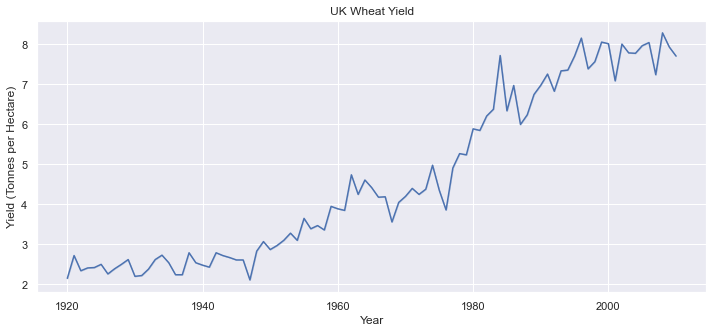

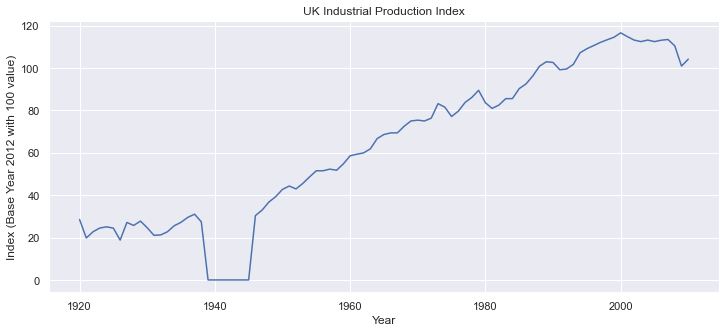

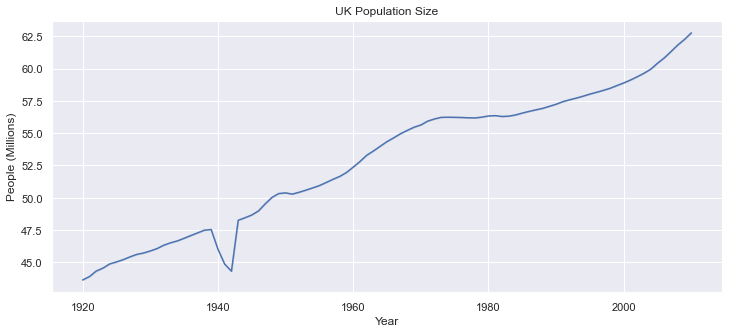

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': (12,5)}, style="darkgrid")
sns.lineplot(x='Year', y='Wheat Yield', data=drought_df)
plt.title('UK Wheat Yield')
plt.ylabel('Yield (Tonnes per Hectare)')
plt.show()

sns.set(rc={'figure.figsize': (12,5)}, style="darkgrid")
sns.lineplot(x='Year', y='Industry Output', data=drought_df, err_style=None)
plt.title('UK Industrial Production Index')
plt.ylabel('Index (Base Year 2012 with 100 value)')
plt.show()

sns.set(rc={'figure.figsize': (12,5)}, style="darkgrid")
sns.lineplot(x=drought_df['Year'], y=drought_df['Population']/1e6)
plt.title('UK Population Size')
plt.ylabel('People (Millions)')
plt.show()

All show signs of increase generally. Need for interpolation across WW2 for IPI data.

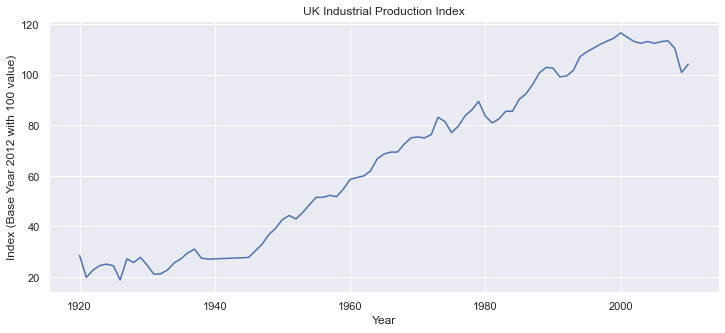

In [19]:
interpol_a = drought_df.iloc[227,3]
interpol_b = drought_df.iloc[312,3]
for i in range(85):
    drought_df.iloc[227+i,3] = interpol_a*(85-i)/85 + interpol_b*i/85
    
sns.set(rc={'figure.figsize': (12,5)}, style="darkgrid")
sns.lineplot(x='Year', y='Industry Output', data=drought_df, err_style=None)
plt.title('UK Industrial Production Index')
plt.ylabel('Index (Base Year 2012 with 100 value)')
plt.show()

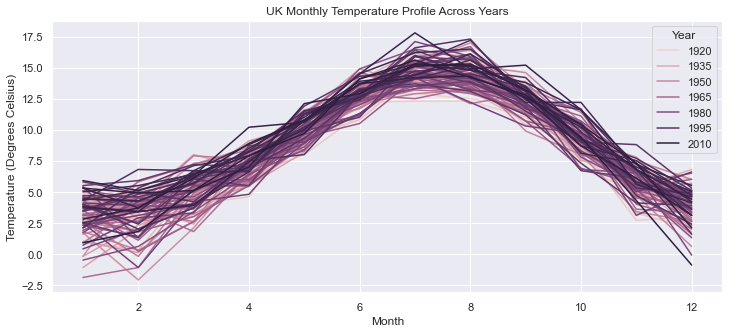

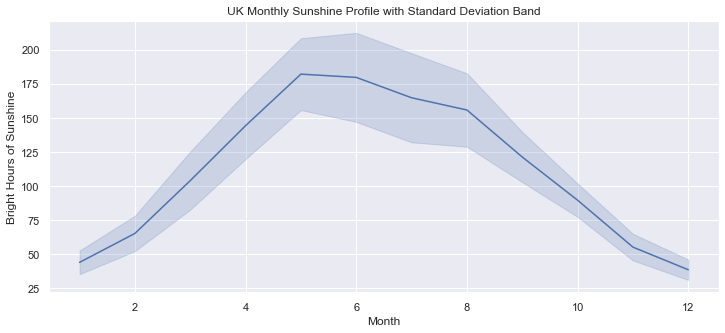

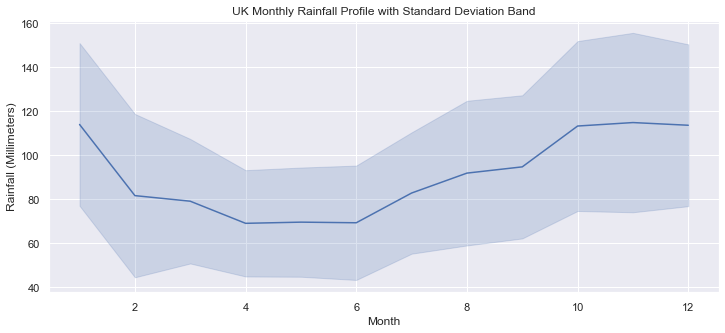

In [20]:
sns.set(rc={'figure.figsize': (12,5)}, style="darkgrid")
sns.lineplot(x='Month', y='Temperature', hue='Year', data=drought_df)
plt.title('UK Monthly Temperature Profile Across Years')
plt.ylabel('Temperature (Degrees Celsius)')
plt.show()

sns.set(rc={'figure.figsize': (12,5)}, style="darkgrid")
sns.lineplot(x='Month', y='Sunshine', data=drought_df, ci='sd')
plt.title('UK Monthly Sunshine Profile with Standard Deviation Band')
plt.ylabel('Bright Hours of Sunshine')
plt.show()

sns.set(rc={'figure.figsize': (12,5)}, style="darkgrid")
sns.lineplot(x='Month', y='Rainfall', data=drought_df, ci='sd')
plt.title('UK Monthly Rainfall Profile with Standard Deviation Band')
plt.ylabel('Rainfall (Millimeters)')
plt.show()


All show a fairly consistent seasonality across the year. Temperature plot shows how this pattern is changing across the years due to climate change. Rainfall has a large variation across the years.

In [92]:
print('Percentage of years spent in drought:', round(np.mean(drought_df['Drought'])*100, 1),'%.')

Percentage of years spent in drought: 33.6 %.


## Model Building
We will try to build a model which outputs the probability of hydrological drought in a particular month based on the six feature variables. It is worth bearing in mind that the model target class ('no drought') makes up about 66.4% of the data, and therefore 0.664 is a good benchmark accuracy. If some sophisticated model cannot exceed this accuracy then it is not worth the computing resources used to build it.

In [23]:
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [261]:
drought_df.drop('Year', inplace=True, axis=1)
X = np.array(drought_df.iloc[:,:-1])
y = np.array(drought_df.iloc[:,-1])
X.shape, y.shape

((1092, 7), (1092,))

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [263]:
scaler_lr = MinMaxScaler()
model_lr = LogisticRegression(solver='liblinear')
pipeline_lr = Pipeline([('scaler', scaler_lr),
                        ('lr', model_lr)])

params_lr = {'lr__C': [100,10,1,0.1,0.01], 'lr__penalty': ['l1','l2']}
gscv_lr = GridSearchCV(pipeline_lr, param_grid=params_lr, scoring='accuracy', cv=5)
gscv_lr.fit(X_train, y_train)
pd.DataFrame(gscv_lr.cv_results_)[['mean_fit_time', 'param_lr__C', 'param_lr__penalty', 'mean_test_score',
                                   'std_test_score', 'rank_test_score']]

,mean_fit_time,param_lr__C,param_lr__penalty,mean_test_score,std_test_score,rank_test_score
0,0.020346,100,l1,0.728591,0.033541,1
1,0.000000,100,l2,0.728591,0.033541,1
2,0.018392,10,l1,0.728591,0.033541,1
3,0.003125,10,l2,0.726299,0.035240,4
4,0.012332,1,l1,0.725163,0.033544,5
5,0.001196,1,l2,0.720558,0.026128,6
6,0.003126,0.1,l1,0.709051,0.033178,7
7,0.000000,0.1,l2,0.690745,0.024739,8
8,0.000000,0.01,l1,0.658654,0.001850,9
9,0.003125,0.01,l2,0.658654,0.001850,9


In [264]:
scaler_dt = MinMaxScaler()
model_dt = DecisionTreeClassifier()
pipeline_dt = Pipeline([('scaler', scaler_dt),
                        ('dt', model_dt)])

params_dt = {'dt__max_depth': [1,2,3,4,5,6,7,8,9,10]}
gscv_dt = GridSearchCV(pipeline_dt, param_grid=params_dt, scoring='accuracy', cv=5)
gscv_dt.fit(X_train, y_train)
pd.DataFrame(gscv_dt.cv_results_)[['mean_fit_time', 'param_dt__max_depth',
                                   'mean_test_score', 'std_test_score', 'rank_test_score']]

,mean_fit_time,param_dt__max_depth,mean_test_score,std_test_score,rank_test_score
0,0.019262,1,0.726279,0.041154,10
1,0.022195,2,0.746837,0.030579,9
2,0.027882,3,0.778949,0.036245,8
3,0.031212,4,0.839718,0.044883,7
4,0.034925,5,0.885498,0.026970,6
5,0.042793,6,0.927875,0.019928,5
6,0.037491,7,0.939304,0.013820,3
7,0.037505,8,0.938148,0.006656,4
8,0.037379,9,0.948453,0.014504,1
9,0.021214,10,0.941576,0.014716,2


In [265]:
gscv_lr.score(X_test, y_test)

0.7488584474885844

In [266]:
gscv_dt.score(X_test, y_test)

0.9497716894977168

In [267]:
gscv_lr.best_estimator_.score(X_test, y_test)

0.7488584474885844

In [64]:
model_lr = LogisticRegression(C=0.5, penalty='l2')
model_lr.fit(X_train, y_train)
print(model_lr.score(X_train, y_train))
print(model_lr.score(X_test, y_test))

0.6680244399185336
0.6272727272727273


In [318]:
model_dt = DecisionTreeClassifier(max_depth=3)
model_dt.fit(X_train, y_train)
print(model_dt.score(X_train, y_train))
print(model_dt.score(X_test, y_test))

0.7731958762886598
0.8036529680365296


In [286]:
model_dt.predict_proba(X[-1].reshape(1,-1))

array([[0.42506812, 0.57493188]])

In [268]:
list(drought_df.columns)

['Month',
 'Wheat Yield',
 'Industry Output',
 'Population',
 'Temperature',
 'Sunshine',
 'Rainfall',
 'Drought']

In [269]:
np.mean(X, axis=0)

array([6.50000000e+00, 4.61373604e+00, 6.54421337e+01, 5.29531258e+07,
       8.49239927e+00, 1.11994505e+02, 9.11945055e+01])

In [270]:
def drought_prediction_plot(clf_pipeline, indep_vars, fixed_vals=None):
    x_ind = list(drought_df.columns).index(indep_vars[0])
    y_ind = list(drought_df.columns).index(indep_vars[1])
    x_vals = np.linspace(np.min(drought_df[indep_vars[0]]), np.max(drought_df[indep_vars[0]]), 101)
    y_vals = np.linspace(np.min(drought_df[indep_vars[1]]), np.max(drought_df[indep_vars[1]]), 101)
    mesh = np.meshgrid(x_vals, y_vals)
    if fixed_vals == None:
        grid_vals = np.array(list(np.mean(X, axis=0))*10201).reshape(101,101,-1)
    else:
        grid_vals = np.array(fixed_vals*10201).reshape(101,101,-1)
    grid_vals[:,:,x_ind] = mesh[0]
    grid_vals[:,:,y_ind] = mesh[1]
    z = np.array([[clf_pipeline.predict(arr.reshape(1,-1))[0] for arr in grid_vals[i,:]] for i in range(101)])
    
    plt.figure(figsize=(5,5))
    plt.style.use('default')
    plt.contourf(x_vals, y_vals, z, 50, cmap='viridis')
    plt.colorbar()
    plt.show()

In [310]:
X[-1]

array([ 1.2000000e+01,  7.7000000e+00,  1.0540000e+02,  6.2759456e+07,
       -9.0000000e-01,  4.6400000e+01,  4.7100000e+01])

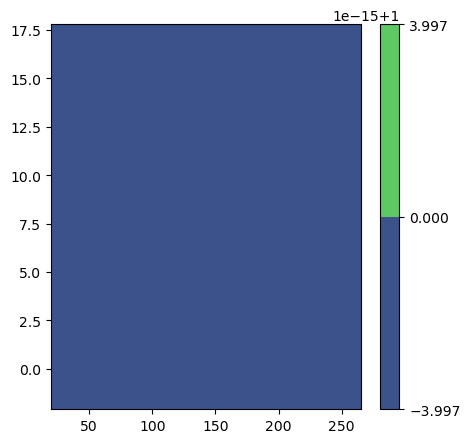

In [336]:
drought_prediction_plot(model_dt, ['Sunshine', 'Temperature'], list(X[-60]))

In [276]:
drought_prediction_plot(model_dt, ['Rainfall', 'Temperature'], list(X[-1]))

array([ 1.2000000e+01,  7.7000000e+00,  1.0540000e+02,  6.2759456e+07,
       -9.0000000e-01,  4.6400000e+01,  4.7100000e+01])

## Conclusion

Decision tree outperforms linear regression, but the model quickly becomes non-interpretable as max_depth increases. Therefore we need to select this parameter to balance the trade-offs.

The linear regression coefficients can show us which features are the most important.



## Evaluation

Learning: pandas/seaborn. Using pipelines with sklearn
Scope for improvement: data collection, time series analysis to consider the future. 